# TASK #1: PROJECT OVERVIEW 


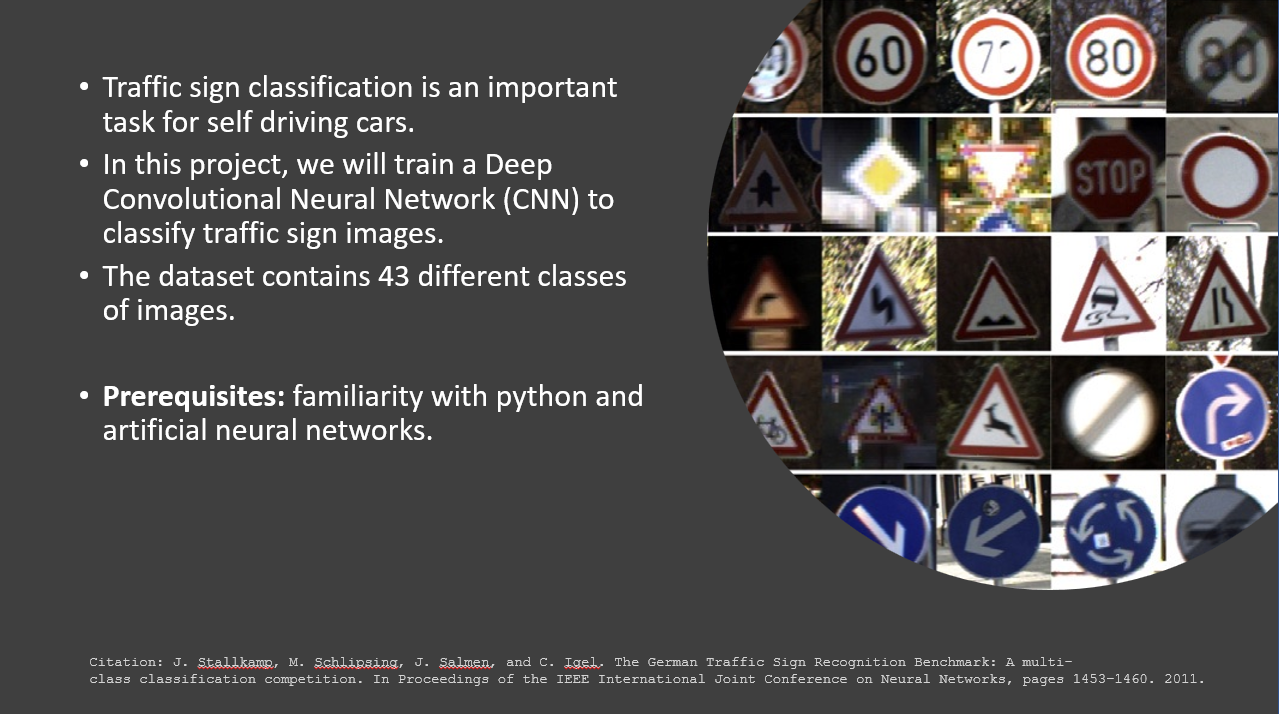

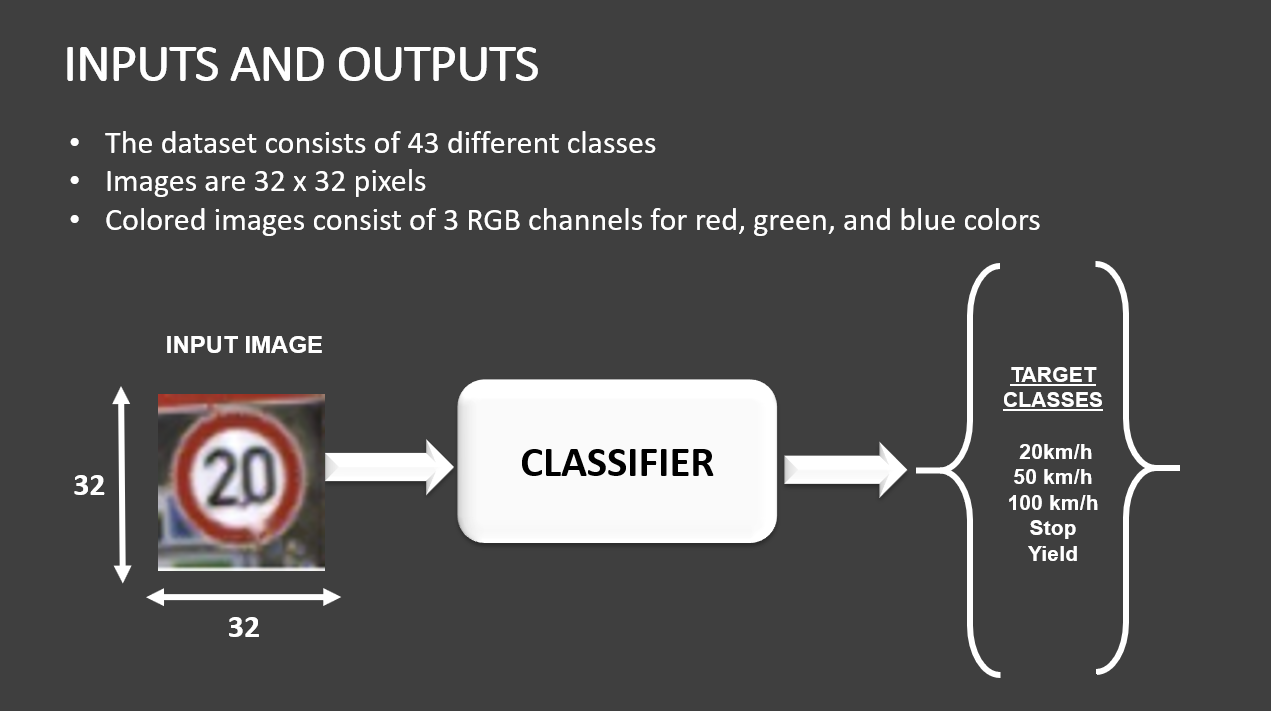

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

# TASK #2: IMPORT LIBRARIES/DATASETS

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

Dowload Data

In [16]:
!gdown 1KBoGkHaCwqyidHGKil1zUwxtLonEbIFm

Downloading...
From: https://drive.google.com/uc?id=1KBoGkHaCwqyidHGKil1zUwxtLonEbIFm
To: c:\NQK-08102002\Classify Traffic Signs Using Deep Learning for Self-Driving Cars\traffic-signs-data.zip

  0%|          | 0.00/124M [00:00<?, ?B/s]
  0%|          | 524k/124M [00:00<00:43, 2.83MB/s]
  1%|▏         | 1.57M/124M [00:00<00:26, 4.65MB/s]
  2%|▏         | 2.62M/124M [00:00<00:23, 5.26MB/s]
  3%|▎         | 3.67M/124M [00:00<00:22, 5.29MB/s]
  4%|▍         | 4.72M/124M [00:01<00:30, 3.87MB/s]
  5%|▍         | 5.77M/124M [00:01<00:42, 2.81MB/s]
  5%|▌         | 6.82M/124M [00:01<00:38, 3.08MB/s]
  6%|▌         | 7.34M/124M [00:02<00:41, 2.80MB/s]
  6%|▋         | 7.86M/124M [00:02<00:48, 2.42MB/s]
  7%|▋         | 8.39M/124M [00:03<01:04, 1.80MB/s]
  7%|▋         | 8.91M/124M [00:03<01:15, 1.54MB/s]
  8%|▊         | 9.96M/124M [00:04<01:08, 1.66MB/s]
  8%|▊         | 10.5M/124M [00:04<01:04, 1.77MB/s]
  9%|▉         | 11.0M/124M [00:04<00:57, 1.96MB/s]
  9%|▉         | 11.5M/124M [00:05<

In [17]:
import zipfile 
with zipfile.ZipFile('traffic-signs-data.zip', 'r') as zip_ref:
    zip_ref.extractall() 

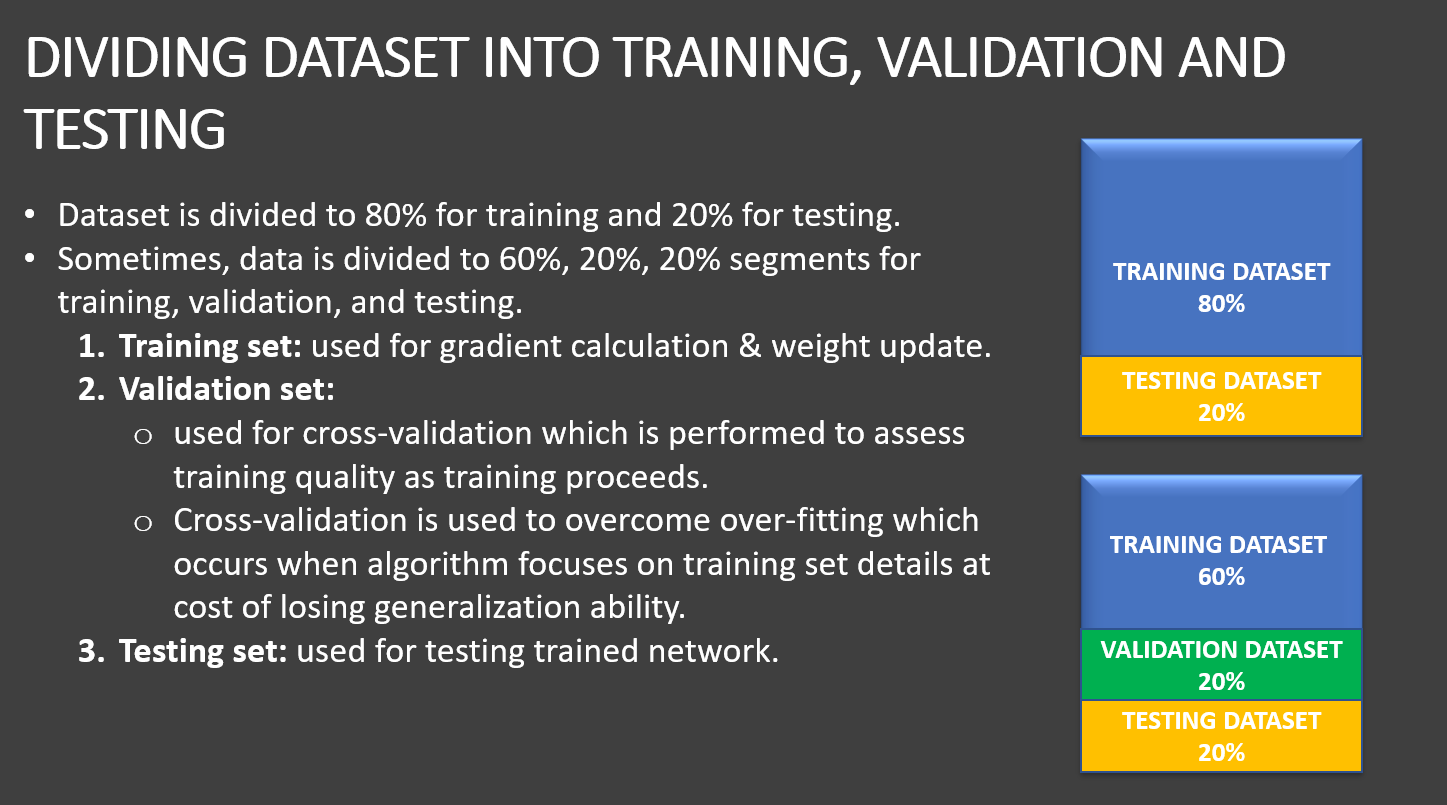

In [18]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [19]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [20]:
X_train.shape

(34799, 32, 32, 3)

In [21]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

31

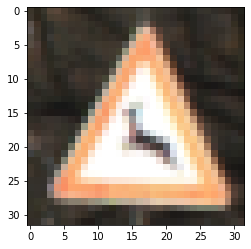

In [22]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

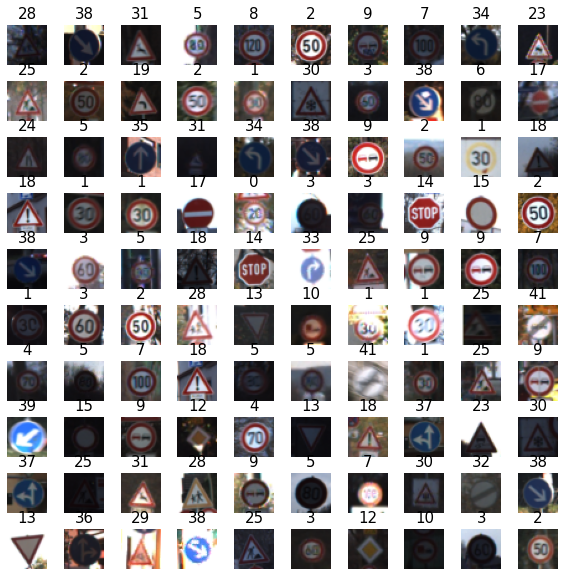

In [23]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in range(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [24]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [25]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

In [26]:
X_train_gray.shape

(34799, 32, 32, 1)

In [27]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

In [28]:
X_train_gray_norm

array([[[[-0.86197917],
         [-0.859375  ],
         [-0.8515625 ],
         ...,
         [-0.84895833],
         [-0.84895833],
         [-0.8515625 ]],

        [[-0.85677083],
         [-0.84635417],
         [-0.84375   ],
         ...,
         [-0.8515625 ],
         [-0.859375  ],
         [-0.86197917]],

        [[-0.8515625 ],
         [-0.83072917],
         [-0.83333333],
         ...,
         [-0.859375  ],
         [-0.85677083],
         [-0.86197917]],

        ...,

        [[-0.88541667],
         [-0.88802083],
         [-0.88541667],
         ...,
         [-0.86458333],
         [-0.87239583],
         [-0.875     ]],

        [[-0.88802083],
         [-0.87760417],
         [-0.87239583],
         ...,
         [-0.8671875 ],
         [-0.8671875 ],
         [-0.875     ]],

        [[-0.89583333],
         [-0.8828125 ],
         [-0.8671875 ],
         ...,
         [-0.85677083],
         [-0.8671875 ],
         [-0.875     ]]],


       [[[-0.6796875 ],


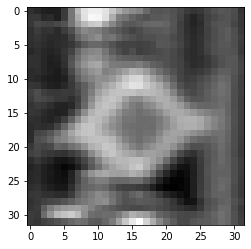

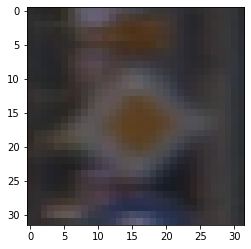

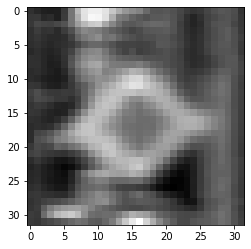

In [29]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

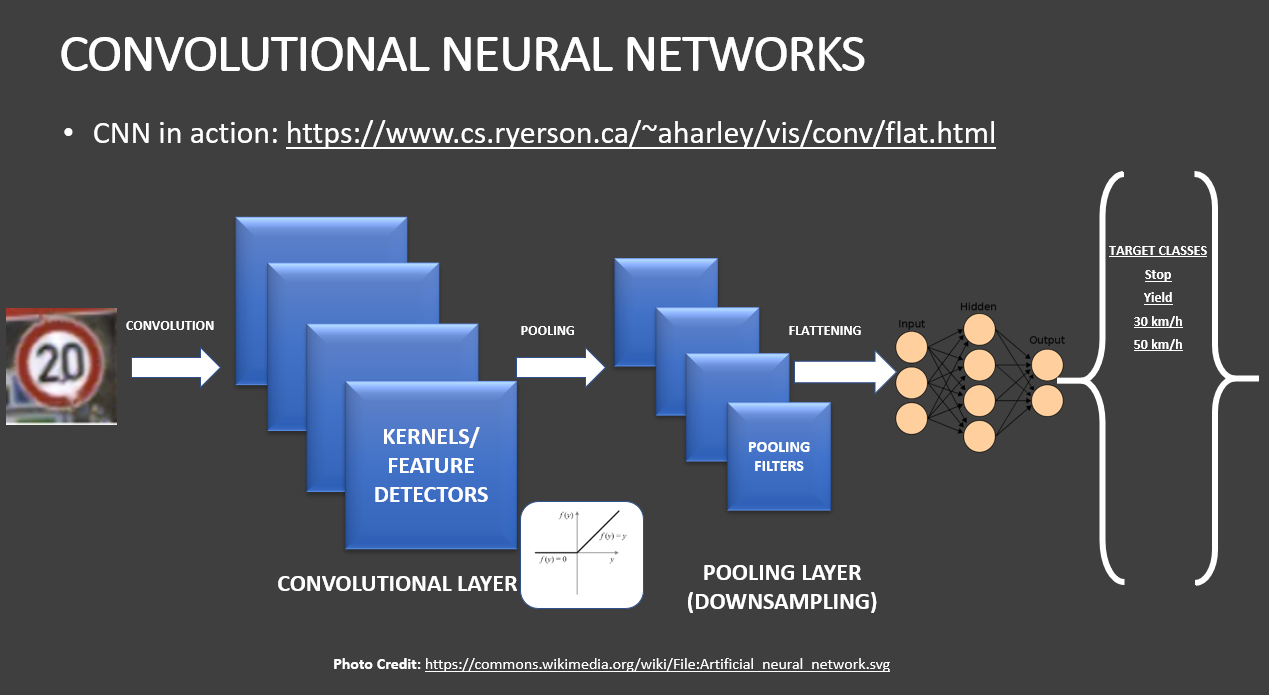

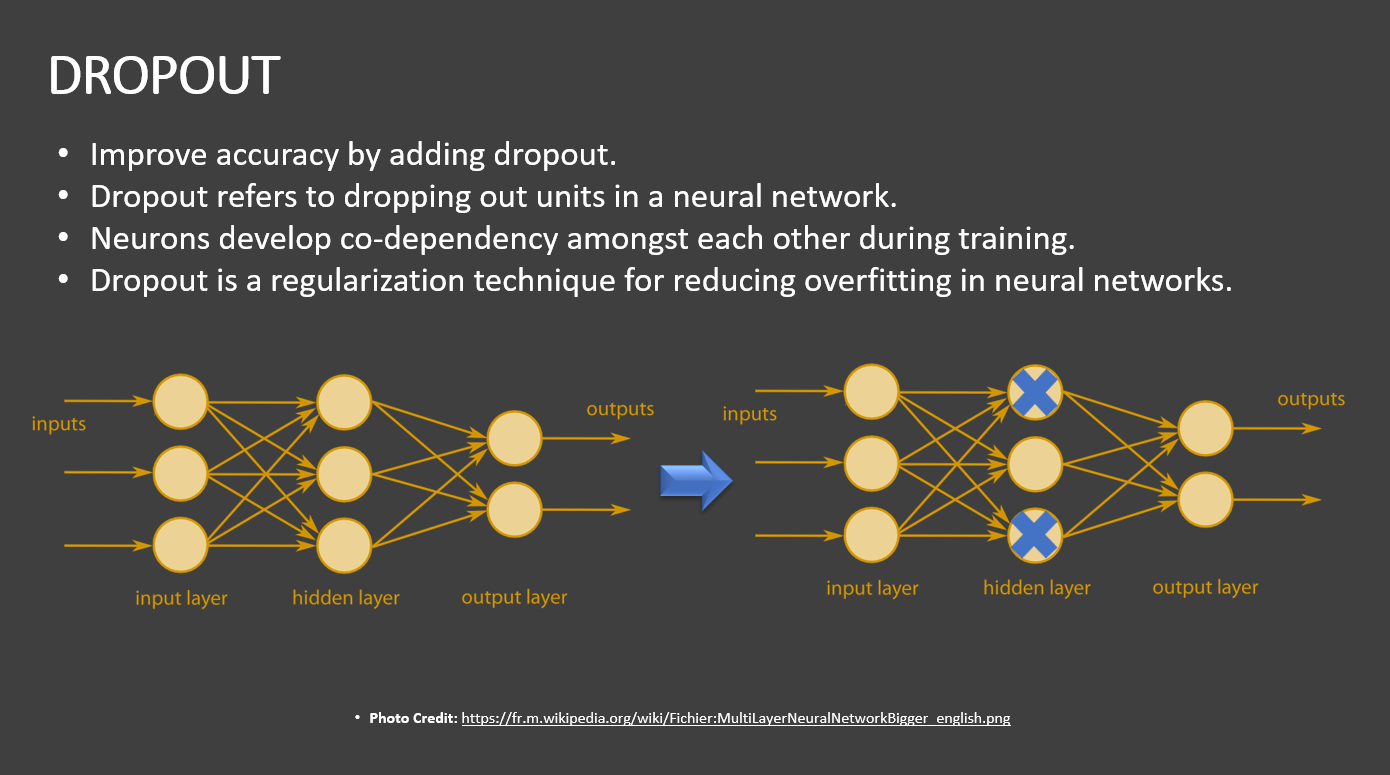

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [30]:
from tensorflow.keras import datasets, layers, models
# from tensorflow.compat.v2.experimental import dtensor
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [31]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size= 500,
                  epochs = 5,
                  verbose = 1,
                  validation_data = (X_valid_gray_norm, y_valid))

Epoch 1/5
70/70 [==============================] - 11s 141ms/step - loss: 3.1861 - accuracy: 0.1707 - val_loss: 2.7770 - val_accuracy: 0.3102
Epoch 2/5
70/70 [==============================] - 11s 150ms/step - loss: 2.0410 - accuracy: 0.4356 - val_loss: 1.8373 - val_accuracy: 0.4968
Epoch 3/5
70/70 [==============================] - 9s 123ms/step - loss: 1.5298 - accuracy: 0.5618 - val_loss: 1.4516 - val_accuracy: 0.6150
Epoch 4/5
70/70 [==============================] - 9s 130ms/step - loss: 1.1997 - accuracy: 0.6502 - val_loss: 1.1625 - val_accuracy: 0.6789
Epoch 5/5
70/70 [==============================] - 9s 127ms/step - loss: 0.9546 - accuracy: 0.7191 - val_loss: 0.9962 - val_accuracy: 0.7061


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

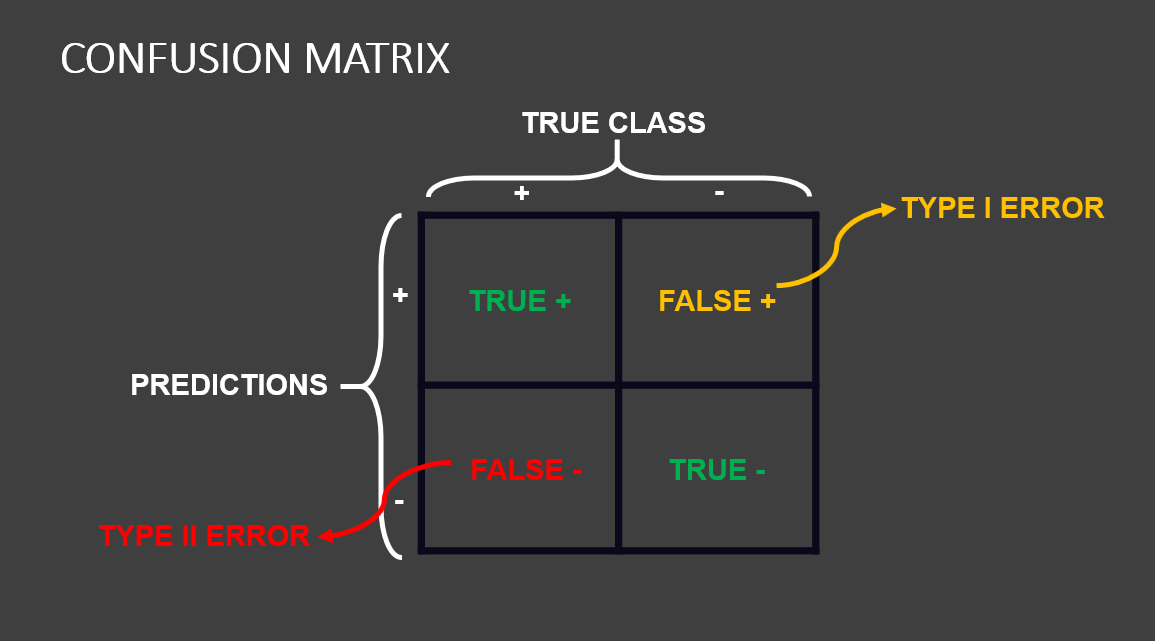

In [33]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 1.1754 - accuracy: 0.6852
Test Accuracy: 0.6851939558982849


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

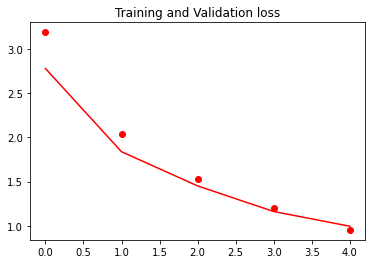

In [36]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

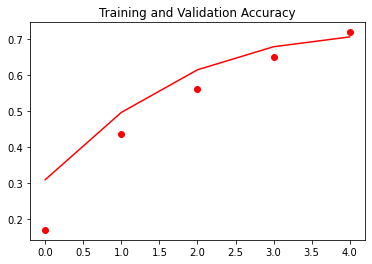

In [37]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

<AxesSubplot:>

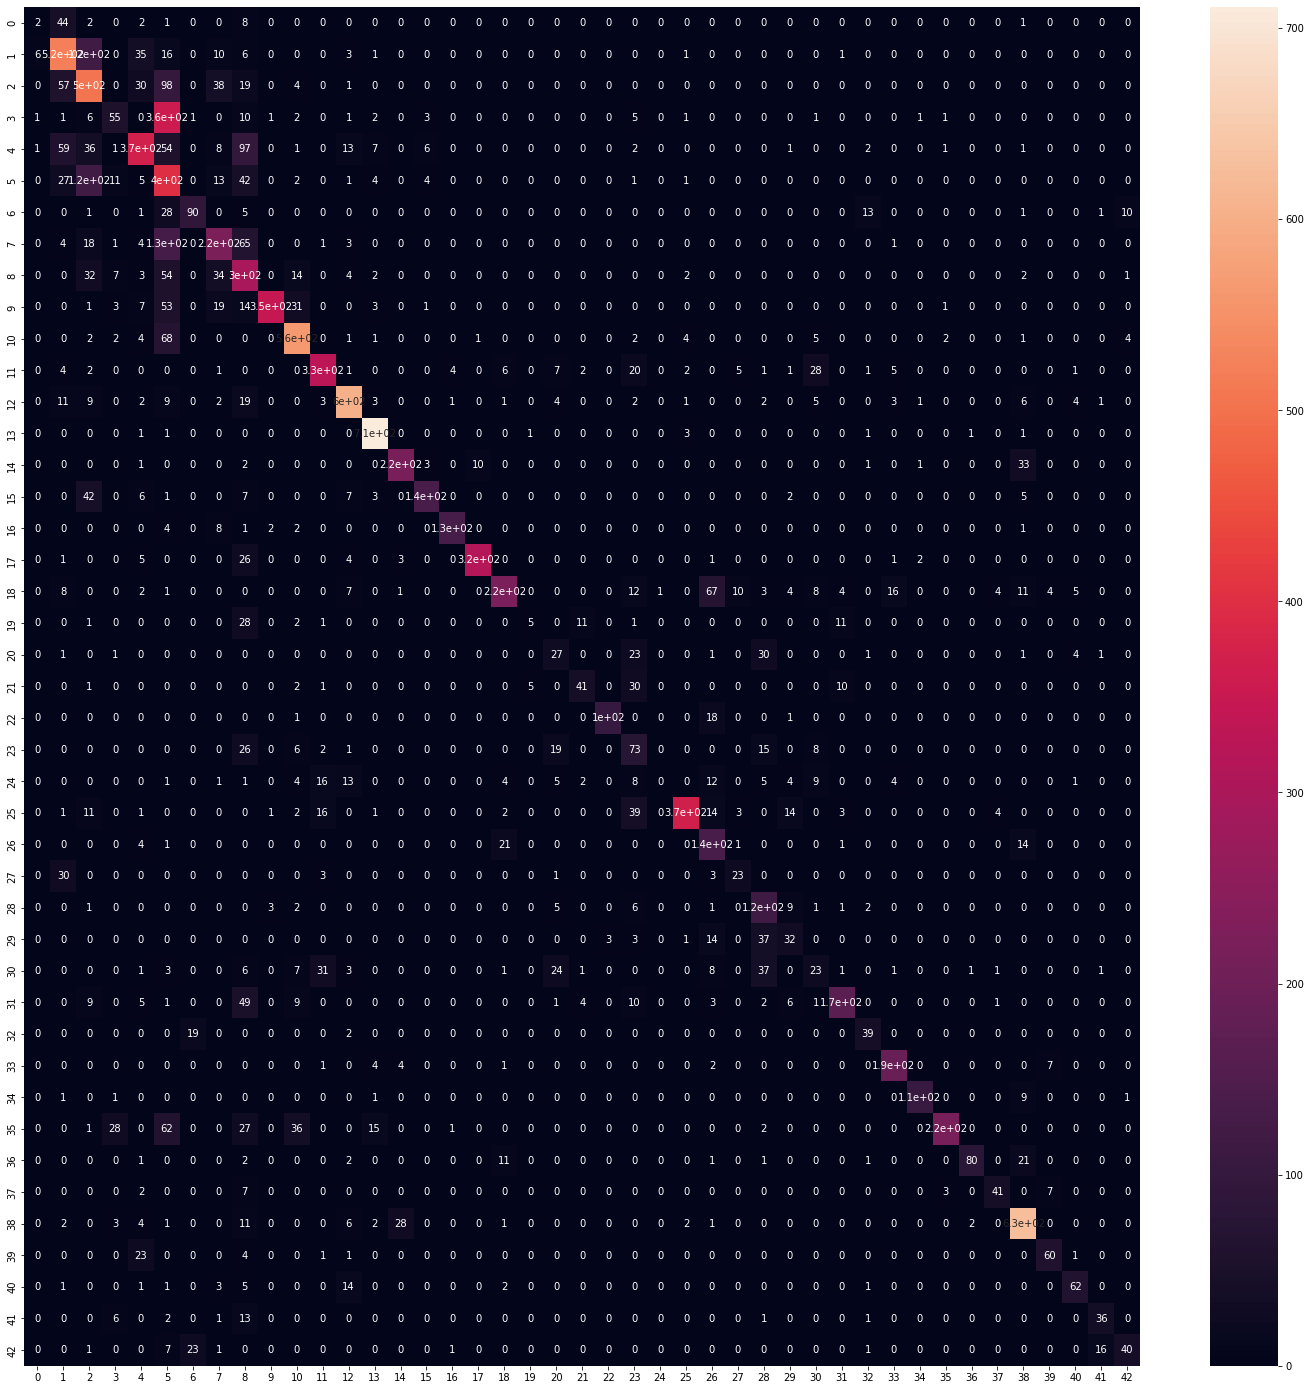

In [38]:
predicted_x = CNN.predict(X_test_gray_norm)
classes_x=np.argmax(predicted_x,axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, classes_x)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

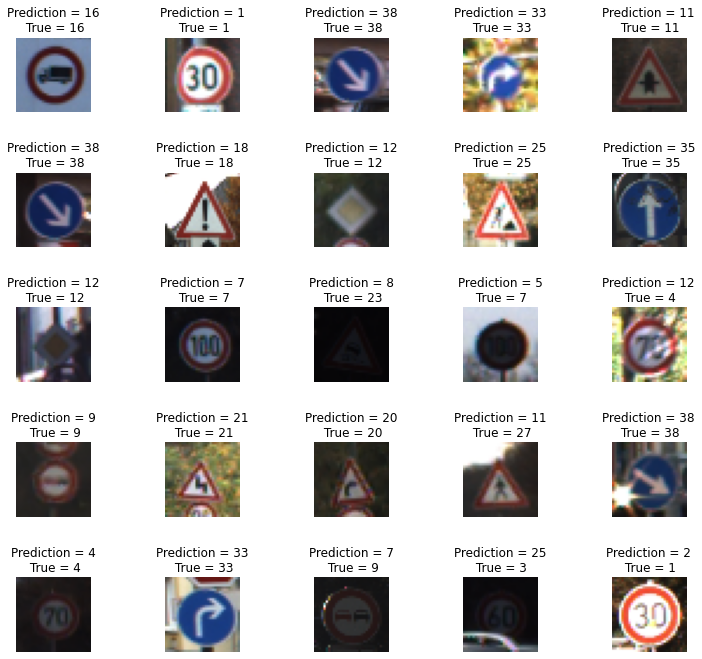

In [39]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    